In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['urls_black.txt', 'urls_teddys.txt', 'urls_grizzly.txt']


In [2]:
from fastai import *
from fastai.vision import *

In [3]:
classes = ['teddys','grizzly','black']

In [4]:
folder = 'black'
file = 'urls_black.txt'

In [5]:
path = Path('data/bears')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [6]:
!cp ../input/* {path}/

In [7]:
download_images(path/file, dest, max_pics=300)

In [8]:
folder = 'teddys'
file = 'urls_teddys.txt'

In [9]:
path = Path('data/bears')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [10]:
download_images(path/file, dest, max_pics=300)

In [11]:
folder = 'grizzly'
file = 'urls_grizzly.txt'

In [12]:
path = Path('data/bears')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [13]:
download_images(path/file, dest, max_pics=300)

In [14]:
#path.ls()

In [15]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

teddys


cannot identify image file <_io.BufferedReader name='data/bears/teddys/00000024.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/teddys/00000080.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/teddys/00000082.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/teddys/00000018.jpg'>
grizzly


cannot identify image file <_io.BufferedReader name='data/bears/grizzly/00000092.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/grizzly/00000062.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/grizzly/00000028.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/grizzly/00000075.jpg'>
black


cannot identify image file <_io.BufferedReader name='data/bears/black/00000086.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/black/00000071.jpg'>


View Data

In [16]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
         ds_tfms=get_transforms(), size=224, num_workers=0).normalize(imagenet_stats)

In [17]:
data.classes

['black', 'grizzly', 'teddys']

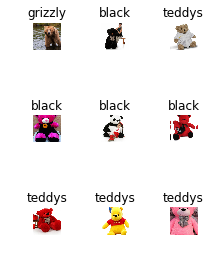

In [18]:
data.show_batch(rows=3, figsize=(3,4))
#data.show_batch(rows=3,fig_size(7,8),num_workers=4)

In [19]:
data.classes, data.c, len(data.valid_ds), len(data.train_ds)

(['black', 'grizzly', 'teddys'], 3, 57, 232)

TRAIN MODEL

In [20]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /tmp/.torch/models/resnet50-19c8e357.pth
102502400it [00:03, 28527378.76it/s]


In [21]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,1.039018,0.263009,0.052632,00:08
1,0.583040,0.171189,0.052632,00:04
2,0.394460,0.243312,0.052632,00:04
3,0.300698,0.287523,0.052632,00:04
4,0.246112,0.299481,0.052632,00:04


In [22]:
learn.save('stage-1')

In [23]:
learn.unfreeze()

In [24]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


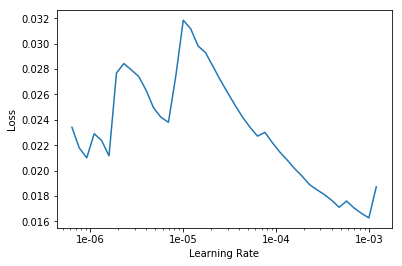

In [25]:
learn.recorder.plot()

In [26]:
learn.fit_one_cycle(4,max_lr=slice(1e-5, 1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.034819,0.350315,0.052632,00:04
1,0.024980,0.364383,0.035088,00:04
2,0.024458,0.370468,0.035088,00:04
3,0.021455,0.386594,0.035088,00:04


In [27]:
learn.save('stage-2')

Interpretation

In [28]:
interp=ClassificationInterpretation.from_learner(learn)

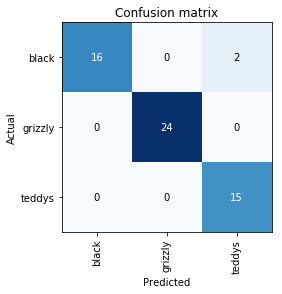

In [29]:
interp.plot_confusion_matrix()

Deleting files using filedeleter gadget

In [30]:
from fastai.widgets import *

In [31]:
ds, idxs = DatasetFormatter().from_toplosses(learn, n_imgs=15)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

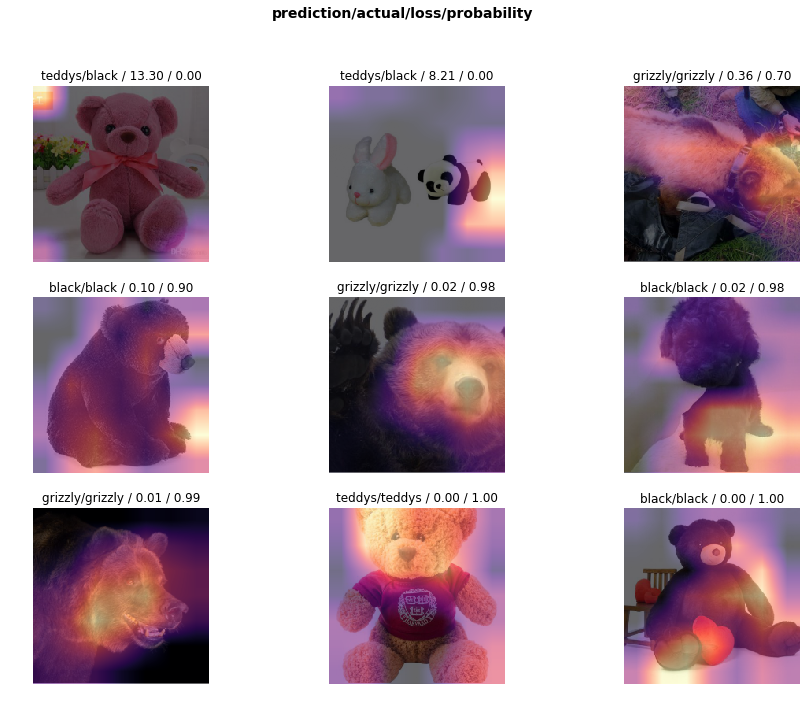

In [32]:
interp.plot_top_losses(9, figsize=(15,11))
ImageCleaner(ds, idxs, path)

CLEAN DUPLICATES

In [33]:
ds, idxs = DatasetFormatter().from_similars(learn)

Getting activations...


Computing similarities...


In [34]:
#ImageCleaner(ds, idxs,path,duplicates=True)

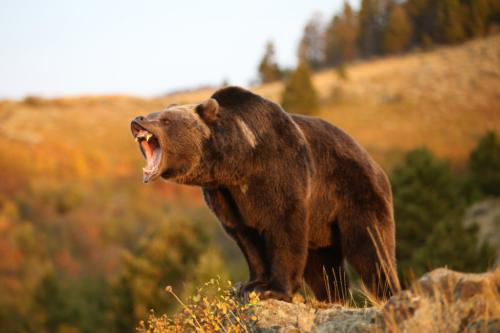

In [35]:
#img = open_image('00000087.jpg')
img = open_image(path/'grizzly'/'00000087.jpg')
img
#pred_class,pred_idx,outputs = learn.predict(img)
#pred_class

In [36]:
data.classes

['black', 'grizzly', 'teddys']

In [37]:
classes = ['black', 'grizzly', 'teddys']

In [38]:
tfms = get_transforms()

In [39]:
data2 = ImageDataBunch.single_from_classes(path, classes, tfms, size=224)
data2.normalize(imagenet_stats)



ImageDataBunch;

Train: LabelList (0 items)
x: ImageList

y: CategoryList

Path: data/bears;

Valid: LabelList (0 items)
x: ImageList

y: CategoryList

Path: data/bears;

Test: None

In [40]:
learn = cnn_learner(data2, models.resnet50).load('stage-2')

In [41]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category grizzly

In [42]:
learn.export()

In [43]:
from flask import Flask
from flask import request
import pickle
import flask

In [44]:
app = flask.Flask(__name__)

#getting our trained model from a file we created earlier
model = pickle.load(open("../Teddys-lesson2.py","r"))

@app.route("/classify-url", methods=["GET"])
async def classify_url(request):
    bytes = await get_bytes(request.query_params["url"])
    img = open_image(BytesIO(bytes))
    _,_,losses = learner.predict(img)
    return JSONResponse({
        "predictions": sorted(
            zip(cat_learner.data.classes, map(float, losses)),
            key=lambda p: p[1],
            reverse=True
        )
    })

FileNotFoundError: [Errno 2] No such file or directory: '../Teddys-lesson2.py'

In [45]:
import pickle
import flask

app = flask.Flask(__name__)

#getting our trained model from a file we created earlier
model = pickle.load(open("Teddys-lesson2.p","rb"))

@app.route('/predict', methods=['POST'])
def predict():
    #grabbing a set of wine features from the request's body
    feature_array = request.get_json()['feature_array']
    
    #our model rates the wine based on the input array
    prediction = model.predict([feature_array]).tolist()
    
    #preparing a response object and storing the model's predictions
    response = {}
    response['predictions'] = prediction
    
    #sending our response object back as json
    return flask.jsonify(response)




FileNotFoundError: [Errno 2] No such file or directory: 'Teddys-lesson2.p'

In [46]:
shutil.rmtree("../models",ignore_errors=True)

In [47]:
final_model_directory = os.getcwd()+ "/../models"
final_model_name='Teddys-lesson2.pkl'
#final_model_name='model.pkl'

In [48]:

learn.export(final_model_directory+f"/{final_model_name}")

Exception: [Errno 2] No such file or directory: '/kaggle/working/../models/Teddys-lesson2.pkl'
 Can't write /kaggle/working/../models/Teddys-lesson2.pkl. Pass an absolute writable pathlib obj `fname`.

In [49]:
!pwd

/kaggle/working
